# Discrete vs Continuous Datasets

Discrete data can only take specific/certain/exact values (e.g. groups, integers). For example, the number of participants in an experiment would be discrete - we can’t have half a participant. 

Continuous data on the other hand can take any value in the scale being measured. For example, we can measure age on a continuous scale (e.g. we can have an age of 26.55 years), also reaction time or the distance you travel to university every day.

## General Probability

When we talk about probability we mean we are interested in the likelihood of an event occurring. The probability of any discrete event occuring can be formulated as: $p = \frac{number of ways the event could arise}{number of possible outcomes}$

The probability of an event is represented by a number between 0 and 1, and the letter $p$. For example, the probability of flipping a coin and it landing on ‘tails’, most people would say, is estimated at $p = .5$, i.e. the likelihood of getting tails is  $p=1/2$ as there is one desired outcome (tails) and two possibilities (heads or tails).

### More examples:

1. Let $P(A)$ be the probability of drawing the ten of clubs from a standard deck of cards. The probability will be 1 in 52: $P(A) = 1/52 = 0.019$. One outcome (ten of clubs) with 52 possible outcomes (all the cards).

2. Let $P(B)$ be the probability of drawing a seven of diamonds from a standard deck of cards. Then the probability of drawing **either** a ten of clubs or seven of diamons would be 2 in 52: $P(A \bigcup B) = 2/52 = 0.38$. In this case you are adding to the chance of an event occurring by giving two possible outcomes so it becomes more likely to happen than when you only had one outcome.

3. Now say you have two standard packs of cards **mixed** together. The probability of drawing the 10 of clubs from this mixed pack would be 2 in 104: $P(A) = 2/104 = 0.019$. Two possible outcomes but more alternatives than above, 104 this time, meaning it is **less probable** than Example 2

4. Let’s instead say you have two **separate** packs of cards. The probability of drawing the 10 of clubs from **both** packs would be: $P(A \bigcap A) = \frac{1}{52} x \frac{1}{52} = 0.0004$. This is called the **joint probability** of events.

+ To find the joint probability of two separate events occuring you multiply together the probabilities of the two individual separate events (often stated as independent, mutually exclusive events).

5. What about the probability of drawing the 10 of clubs from a pack of 52, putting it back (which we call **replacement**), and subsequently drawing the 7 of diamonds? Again, this would be represented by multiplying together the probability of each of these events happening: $p = \frac{1}{52} x \frac{1}{52} = 0.0004$.

+ The second event (drawing the 7 of diamonds) has the same probability as the first event (drawing the 10 of clubs) because we put the original card back in the pack, keeping the number of all possible outcomes at 52. This is **replacement**.

6. Finally, say you draw the 10 of clubs from a pack of 52, **without replacement**. What is the probability that you will draw the 7 of diamonds in your next draw (again **without replacement**) and the 3 of hearts in a third draw? $p = \frac{1}{52} x \frac{1}{51} x \frac{1}{50} = 0.000008$.

### Questions:

* What is the probability of randomly drawing your name out of a hat of 12 names where one name is definitely your name?: 

+ What is the probability of randomly drawing your name out of a hat of 12 names, putting it back, and drawing your name again?:

+ You have 120 cards, where 10 are red and 110 are blue. What is the probability of randomly removing one red card on your first trial, not replacing it, and then removing another red card on the second trial?:

## Creating a Simple Probability Distribution

What is a **sampling distribution**? A sampling distribution shows you the probability of drawing a sample with certain characteristics from the population; e.g. the probability of 5 heads in 10 flips, or the probability of 4 heads in 10 flips, or the probability of X heads in 10 flips of the coin.

Scenario: Imagine we want to know the probability of X number of heads in 10 coin flips - for example, what is the probability of flipping a coin 10 times and it coming up heads two times.

To simulate 10 coin flips we will use the `sample()` function where we randomly sample (with replacement) from all possible events: i.e. either heads or tails.



In [7]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
?sample

In [5]:
sample(c("HEADS", "TAILS"), 10, TRUE) 

[1] "TAILS" "HEADS" "HEADS" "TAILS" "HEADS" "HEADS" "TAILS" "TAILS" "TAILS"
[10] "TAILS"

(Why would you or why wouldn’t you want to use sampling with replacement in our coin toss scenario? If you aren’t sure then set replacement as `FALSE` (change the last argument from `TRUE` to `FALSE`) and run the code again. The code will stop working after 2 coin flips. We want to sample with replacement here because we want both options available at each sampling - and if we didn’t then we would run out of options very quickly since we’re doing 10 flips.)

So far our code returns the outcomes from the 10 flips; either heads or tails. If we want to count how many ‘heads’ we have we can simply sum up the heads. However, heads isn’t a number, so to make life easier we can re-label our events (i.e. our flips) as **0 for tails** and **1 for heads**. Now if we run the code again we can pipe the sample into a sum() function to total up all the 1s (heads) from the 10 flips.

In [10]:
sum(sample(0:1, 10, TRUE))

[1] 4

In [9]:
sample(0:1, 10, TRUE) %>% sum() 

[1] 5

The ouptut of this line changes every time we run the code as we are randomly sampling 10 coin flips each time. By running this code over and over again we are basically demonstrating how a sampling distribution is created.

Now in order to create a full and accurate sampling distribution for our scenario we need to replicate these 10 flips a large number of times - i.e. replications. The more replications we do the more reliable the estimates. Let’s do 10000 replications of our 10 coin flips. This means we flip the coin 10 times, count how many heads, save that number, and then repeat it 10000 times. We could do it the slow way we demonstrated above, just running the same line over and over and over again and noting the outcome each time. Or we could use the `replicate()` function.

In [36]:
heads10k <- replicate(10000, sample(0:1, 10, TRUE) %>% sum()) # saving results to a vector  

In [37]:
str(heads10k)

 int [1:10000] 6 5 4 7 6 3 4 4 7 8 ...


Steps to create our distribution:
+ Convert the vector into a data frame (a tibble) so we can work on it. The numbers will be stored in a column called `heads`.
+ Then group the results by the number of possible `heads`; i.e. group all the times we got 5 heads together, all the times we got 4 heads together, etc.
+ Calculate the probability of a `heads` result, (e.g. probability of 5 heads), by totaling the number of observations for each possible result (e.g. 5 heads) and submitting it to our probability formula above (number of outcomes of event divided by all possible outcomes)

In [38]:
data10k <- tibble(heads = heads10k) %>%       # creating a tibble/dataframe
                group_by(heads) %>%           # group by number of possibilities
                summarise(n = n(), p=n/10000) # count occurances of possibility,
                                              # & calculate probability (p) of
                                              # each

According to the `tibble` documentation website: "[Tibbles are a] modern reimagining of the `data.frame`, keeping what time has proven to be effective, and throwing out what is not. Tibbles are `data.frames` that are lazy and surly: they do less (i.e. they don’t change variable names or types, and don’t do partial matching) and complain more (e.g. when a variable does not exist). This forces you to confront problems earlier, typically leading to cleaner, more expressive code.

In [39]:
data10k

,heads,n,p
,<int>,<int>,<dbl>
1,0,3,0.0003
2,1,111,0.0111
3,2,445,0.0445
4,3,1103,0.1103
5,4,1986,0.1986
6,5,2485,0.2485
7,6,2121,0.2121
8,7,1209,0.1209
9,8,427,0.0427


Let's visualize the data

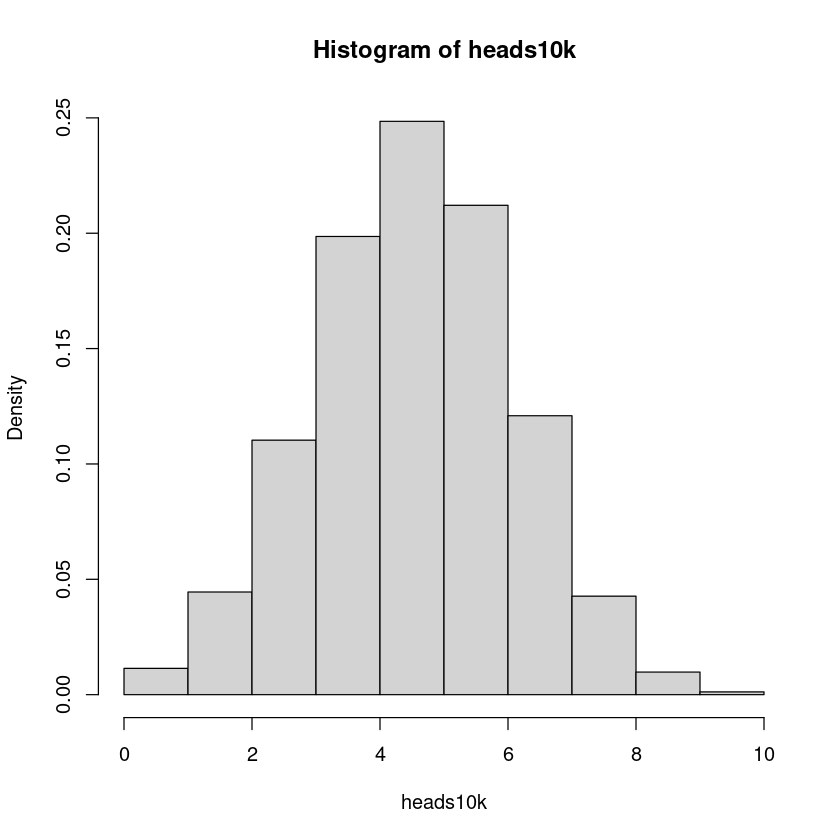

In [50]:
hist(heads10k, freq=FALSE, breaks=10)

Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


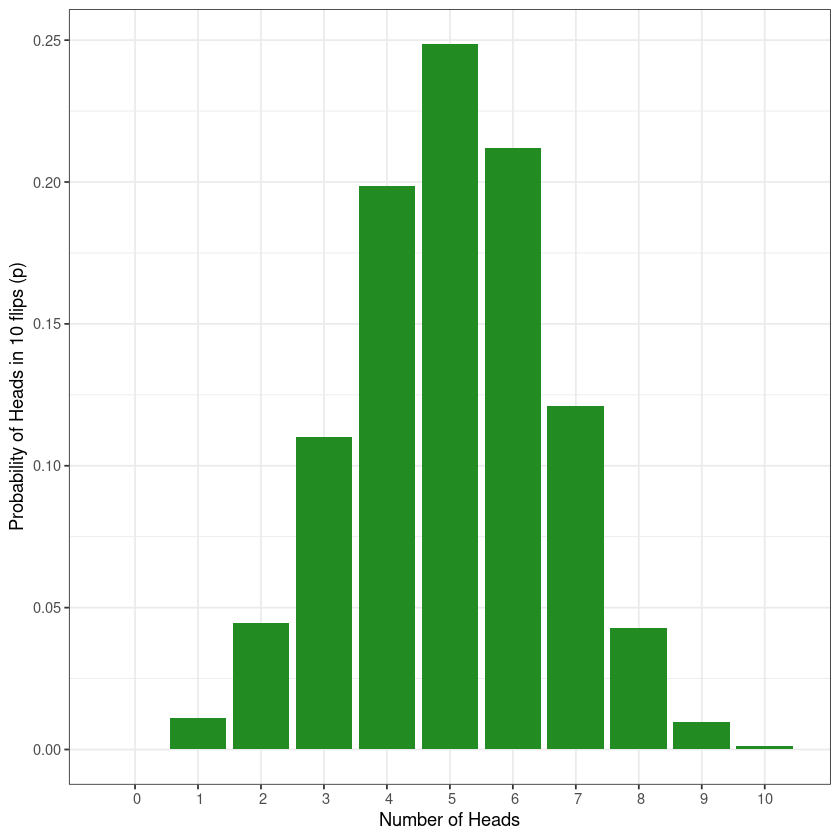

In [41]:
ggplot(data10k, aes(heads,p)) + 
  geom_col(fill = "forest green") + 
  labs(x = "Number of Heads", y = "Probability of Heads in 10 flips (p)") +
  theme_bw() +
  scale_x_discrete(limits=0:10)

---
#### A little bit about ggplot()

The two main things to know about working with ggplot are that:

a. the usual format is:
`ggplot(data, aes(x = x_axis, y = y_axis)) + geom_type_of_plot()`
b. it works on a concept of layers

On **point a**: The first thing you enter is your dataframe/tibble; your `data`. Then within the `aes()` you say what is my `x_axis` and `y_axis`, using the column names from within your tibble. `aes` stands for aesthetics and maps data into visual features. Finally you tell the code what type of plot you want.

On **point b**: Layers are a common way for graphics to work. Think about it as ggplot() fucntion creating your first layer and then every function after that is adding more layers on top to create the figure you want. The first layer is always your data and the axis/axes, i.e. ggplot(….). The second layer, added by using the plus symbol ‘+’, is the type of plot. We'll see more examples of layers in the future.

---
Note that as the possible number of heads in 10 flips are all related to one another, then summing up all the probabilities of the different number of heads will give you a total of 1. This is different to what we looked at earlier in cards where the events were unrelated to each other. As such, you can use this informaiton to start asking questions such as what would be the probability of obtaining 2 or less Heads in 10 flips? If using the results above, then:

$P(X=0) = $

In [51]:
data10k$p[data10k$heads==0]

[1] 3e-04

$P(X=1) = $

In [52]:
data10k$p[data10k$heads==1]

[1] 0.0111

$P(X=2) = $

In [53]:
data10k$p[data10k$heads==2]

[1] 0.0445

In [55]:
data10k$p[data10k$heads==c(0:2)] %>% sum()

Warning message in data10k$heads == c(0:2):
“longer object length is not a multiple of shorter object length”


[1] 0.0559

### Questions:

Look at the probability values corresponding to the number of coin flips you created in the data10k sample distribution.

1. Choose from the following options, if you wanted to calculate the probability of getting 4, 5 or 6 heads in 10 coin flips you would:
    + A: multiply individual probabilities together
    + B: sum individual probabilities together

2. Choose from the following options, if you wanted to calculate the probability of getting 6 or more heads in 10 coin flips you would:
    + A: multiply individual probabilities together
    + B: sum individual probabilities together

3. Choose from the following options, the distribution we have created is:
    + A: continuous
    + B: discrete

Not sure if you should be summing or multiplying probabilities? A good way to remember, from both the coin flip examples and from the pack of cards examples earlier, is that if the scenarios are **related** you are summing probabilities, if scenarios are **separate** you are multiplying probabilities. **Related** scenarios are usually asking you about the probability of ‘either / or’ scenarios occuring, whereas separate scenarios usually ask about the probability of one scenario ‘and’ another scenario both occuring. This is a separate concept from **independence**.

## The Binomial Distribution

Great, so we are now learning how probabilities and distributions work. However, if we had wanted to calculate the probability of 8 heads from 10 coin flips we don’t have to go through this entire procedure each time. Instead, because we have a dichotomous outcome, “heads or tails”, we can establish probabilities using the **binomial distribution** - effectively what you just created. You can look up the R help page on the binomial distribution (type `?dbinom` directly into the console) to understand how to use it but we will walk through some essentials here.

We’ll use 3 functions to work with the binomial distribution and to ask some of the questions we have asked above:

+ `dbinom()` - **the density function**. This function gives you the probability of `x` successes (e.g. heads) given the `size` (e.g. number of trials) and probability of success `prob` on a single trial (here it’s 0.5, because we assume we’re flipping a fair coin - Heads or Tails).

+ `pbinom()` - **the distribution function**. This function gives you the probability of getting a number of successes below a certain cut-off point given the `size` and the `prob`. This would be for questions such as the probability of 5 heads or less for example. It sums the probability of 0, 1, 2, 3, 4 and 5 heads.

+ `qbinom()` - **the quantile function**. This function is the inverse of `pbinom` in that it gives you the x-axis value below (and including the value) which the summation of probabilities is greater than or equal to a given probability `p`, given the `size` and `prob`. In other words, how many heads would you need to have a probability of $p = 0.0571$.

**Note:** When discussing discrete distributions, we talk about **probabilities** at a particular value. However, in continuous distributions, like the normal distribution we looked at last week, we talk about **probability densities**. As John mentioned in lecture, in a continuous distribution, the probability at an instantaneous point is **0**, because the interval length is 0. More simply put, the y-axis in discrete distributions are **probabilities**, whereas the y-axis in continuous distributions are **probability densities**. 

### dbinom() - The Density Function

Using the `dbinom()` function we can create probabilities for any possible outcomes where there are two possibilities of outcome on each trial - e.g. heads or tails, cats or dogs, black or red. The dbinom (density binom) function takes the format of `dbinom(x, size, prob)`, where the arguments we give are:
+ `x` - the number of ‘heads’ we want to know the probability of
+ `size` - the number of trials (flips) we are doing; in this case, 10 flips
+ `prob` - the probability of ‘heads’ on one trial

We are going to stick with the coin flip idea. Here we are showing the code for obtaining 3 heads in 10 flips:

In [56]:
dbinom(3, 10, 0.5)

[1] 0.1171875

In [57]:
dbinom(0:10, 10, 0.5)

[1] 0.0009765625 0.0097656250 0.0439453125 0.1171875000 0.2050781250
 [6] 0.2460937500 0.2050781250 0.1171875000 0.0439453125 0.0097656250
[11] 0.0009765625

And if we plot the probability of all possible outcomes in 10 flips it would look like this:

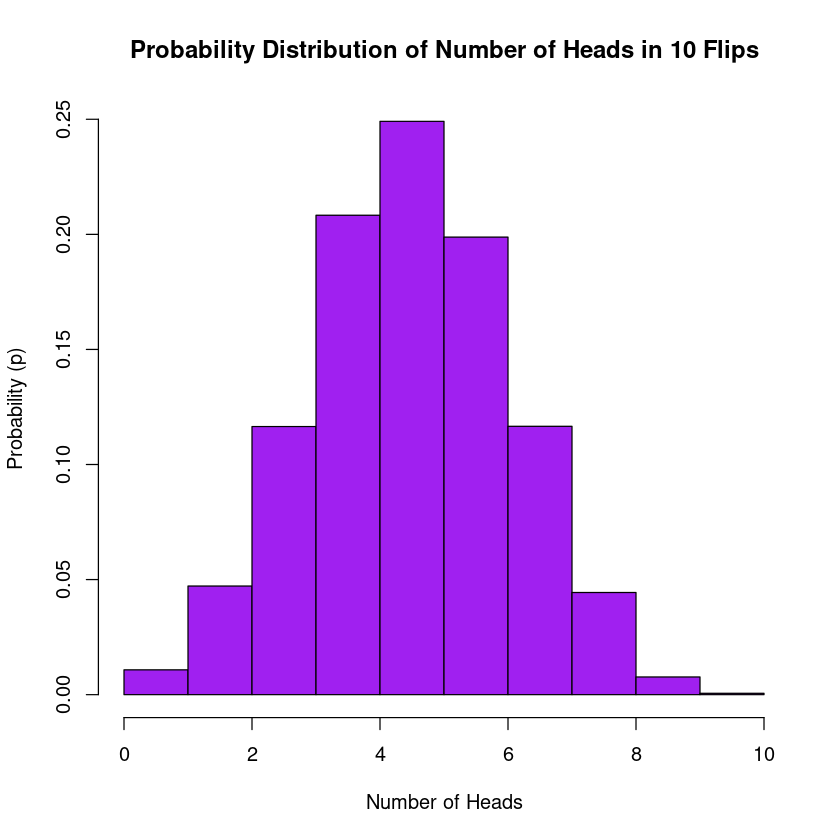

In [66]:
hist(rbinom(10000, 10, 0.5), freq=FALSE, breaks=10, col='purple', 
        main= "Probability Distribution of Number of Heads in 10 Flips",
        xlab = "Number of Heads",
        ylab = "Probability (p)")

### Questions: 
+ What is the probability of 2 heads out of 10 flips?

### pbinom() - The Cumulative Probability Function

What if we wanted to know the probability of **up to and including** 3 heads out of 10 flips? We have asked similar questions above. We can either use dbinom for each outcome up to 3 heads and sum the results:

In [68]:
dbinom(0:3, 10, 0.5) %>% sum()

[1] 0.171875

Or we can use the `pbinom()` function; known as the **cumulative probability distribution function** or the cumulative density function. The first argument we give is the **cut-off value up to and including** the value which we want to know the probability of (here it’s up to 3 `heads`). Then, as before, we tell it how many flips we want to do and the probability of heads on a single trial.

In [69]:
pbinom(3, 10, 0.5, lower.tail = TRUE)  

[1] 0.171875

So the `pbinom` function gives us the **cumulative probability** of outcomes up to and including the cut-off. But what if we wanted to know the probability of outcomes **including and above** a certain value? Say we want to know the probability of 7 heads or more out of 10 coin flips. The code would be this:

In [70]:
pbinom(6, 10, 0.5, lower.tail = FALSE) 

[1] 0.171875

### Questions:

1. Using the format shown above for the `pbinom()` function, enter the code that would determine the probability of up to and including 5 heads out of 20 flips, assuming a probability of 0.5:

2. What is the probability of obtaining more than but not including 50 heads in 100 flips?

3. How can you confirm number 2 using `dbinom()`?

### qbinom() - The Quantile Function

The `qbinom()` function is the inverse of the `pbinom()` function. Whereas with `pbinom()` you supply an outcome value x and get a tail probability, with `qbinom()` you supply a tail probability and get the outcome value that (approximately) cuts off that tail probability. Think how you would rephrase the questions above in the `pbinom()` to ask a `qbinom()` question. Worth noting though that `qbinom()` is approximate with a discrete distribution because of the “jumps” in probability between the discrete outcomes (i.e. you can have probability of 2 heads or 3 heads but not 2.5 heads).

Below is code for the probability of 49 heads or less in 100 coin flips.

In [71]:
p <- pbinom(49, 100, .5, lower.tail = TRUE)
p

[1] 0.4602054

In [72]:
qbinom(p, 100, .5, lower.tail = TRUE)

[1] 49

This can be stated as the number of heads required to obtain a probability of 0.4602054 is 49. So the `qbinom()` function is useful if you want to know the minimum number of successes (‘heads’) that would be needed to achieve a particular probability. This time the cut-off we specify is not the number of ‘heads’ we want but the **probability** we want.

For example say we want to know the maximum number of ‘heads’ out of 10 flips that would result in a 5% heads success rate (a probability of .05), we would use the following code.

In [73]:
qbinom(.05, 10, 0.5, lower.tail = TRUE) 

[1] 2

In [74]:
qbinom(.05, 10, 0.5, lower.tail = FALSE) 

[1] 8

### Questions:
+ What is the maximum number of heads associated with a tail probability of 10% (.1) in 17 flips?